<a href="https://colab.research.google.com/github/SajadAghapour/Numerical-Relativity-Simulations/blob/main/motion_in_Schwarzschild.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

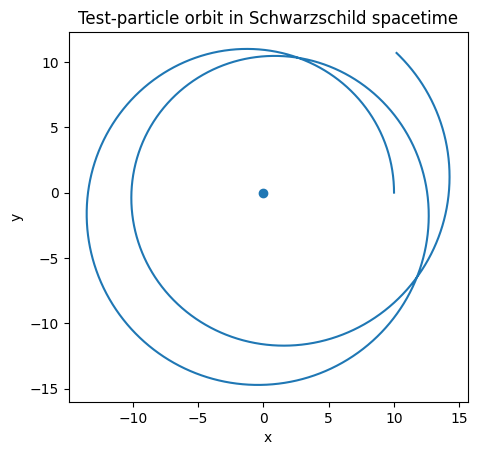

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- Parameters (G=c=1) ---
M = 1.0                # black hole mass
r0 = 10.0 * M          # initial radius
vr0 = 0.0              # initial radial velocity dr/dτ
L  = 4.0 * M           # choose some angular momentum

def f(r):
    return 1.0 - 2.0*M/r

def V_eff(r, L):
    return f(r) * (1.0 + L**2 / r**2)

# Compute energy from initial conditions
E = np.sqrt(vr0**2 + V_eff(r0, L))

# --- ODE system in proper time τ ---
# y = [t, r, phi, v_r]
def geodesic_tau(tau, y):
    t, r, phi, vr = y
    fr = f(r)
    dt_dtau   = E / fr
    dr_dtau   = vr
    dphi_dtau = L / r**2
    dvr_dtau  = -(L**2 * (3*M - r) + M * r**2) / r**4
    return [dt_dtau, dr_dtau, dphi_dtau, dvr_dtau]

# --- Integrate ---
tau_max = 500.0
y0 = [0.0, r0, 0.0, vr0]

sol = solve_ivp(
    geodesic_tau,
    t_span=(0.0, tau_max),
    y0=y0,
    max_step=0.1,
    dense_output=False
)

t_arr, r_arr, phi_arr, vr_arr = sol.y

# Convert to Cartesian for plotting
x = r_arr * np.cos(phi_arr)
y = r_arr * np.sin(phi_arr)

plt.figure()
plt.plot(x, y)
plt.scatter([0], [0], marker='o')  # black hole at origin
plt.gca().set_aspect('equal', 'box')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test-particle orbit in Schwarzschild spacetime')
plt.show()
